# **Clustering algorithms**

This notebook is dedicated to checking fundamental algorithm of clustering with one of [Kaggle competitions](https://www.kaggle.com/competitions/tabular-playground-series-jul-2022). Here we have 30 features whose nature we do not know and the task was to somehow clusterize them. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EDA**

Firstly, I view the dataset

In [53]:
data = pd.read_csv('/content/drive/MyDrive/data (1).csv')
data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


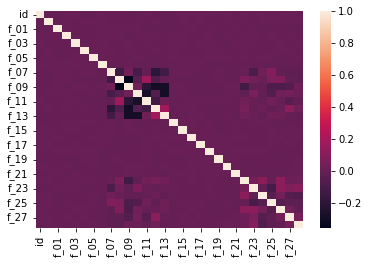

In [ ]:
sns.heatmap(data.corr())

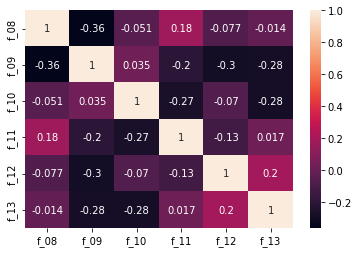

In [ ]:
data_sub = data[['f_08','f_09','f_10','f_11','f_12','f_13']]
sns.heatmap(data_sub.corr(), annot = True)

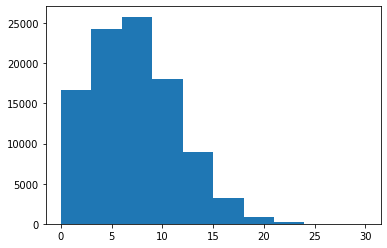

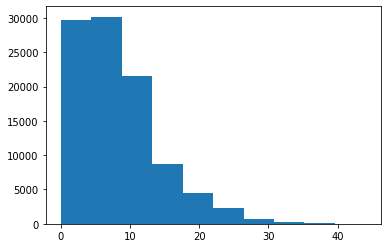

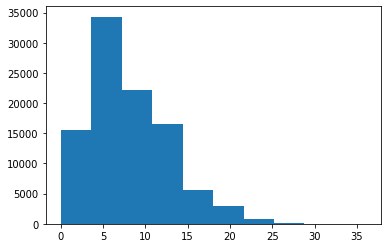

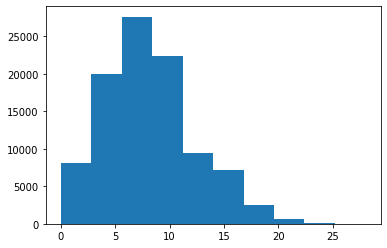

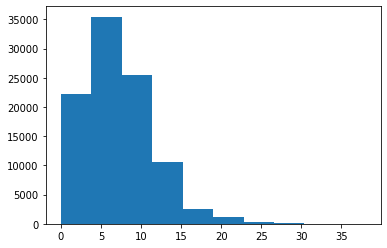

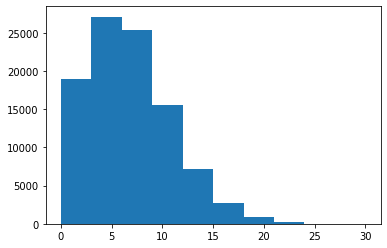

In [ ]:
for var in data_sub.columns:
    plt.hist(data_sub[var])
    plt.show()

We see that correlated features are lognormally distributed and are integers.

In [4]:
df = data.iloc[:,1:] #getting rid of the id column
df

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


**PCA**

Let's try to reduce dementional space. Supposedly, this should enhance clustering

In [ ]:
from sklearn.decomposition import PCA

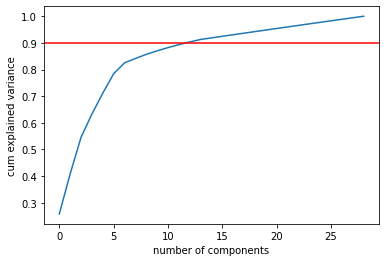

In [ ]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cum explained variance')
plt.axhline(y=0.90, color='r', linestyle='-')
#plt.axvline(x=5, color='g', linestyle='dotted')

In [ ]:
components = PCA(n_components=10).fit_transform(df)
pca_df = pd.DataFrame(components)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.556157,-5.557613,-3.270329,-8.104520,0.071561,-1.385427,2.828349,-0.093798,-2.157359,0.882568
1,-4.568477,0.739470,10.157775,-2.021838,2.693037,-0.601251,-1.631069,0.216927,2.143394,-1.156706
2,-4.351624,-1.553507,-3.405976,-0.571658,-5.900841,1.270737,0.877543,-0.759745,1.286147,-0.647782
3,6.138703,-1.486696,1.174469,0.735869,2.638841,1.990482,-1.024242,-0.871499,1.439636,-0.386635
4,-5.003507,0.168320,8.519061,3.071894,-3.085874,-5.797014,0.273272,-0.453798,2.644537,-1.291332


In [ ]:
df_plus_pca = pd.concat([df, pca_df], axis=1)

In [ ]:
df_plus_pca.corr().iloc[31:,:29]

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
2,0.002271,-0.006589,-0.003420,-0.003074,0.002313,-0.000373,0.007027,-0.130589,-0.556770,0.136856,...,-0.006006,0.002095,-0.005440,-0.020534,-0.030827,0.000203,-0.047703,-0.058515,0.069136,0.032441
3,-0.002803,0.005188,0.001562,-0.001762,0.005408,0.005024,-0.001736,0.857789,-0.370555,-0.213476,...,0.001234,-0.003970,0.001329,0.016465,-0.087994,0.028027,0.092849,-0.010239,0.004306,-0.022774
4,0.003233,-0.000776,0.002307,0.004121,0.002600,0.000981,-0.002359,0.082969,-0.232846,-0.011369,...,0.000343,-0.001243,0.002904,0.013919,-0.029477,0.017530,-0.017291,-0.045121,0.062493,0.033107
5,0.000349,-0.004093,-0.001187,-0.000166,-0.003351,0.001204,-0.001970,-0.227107,-0.469378,-0.041058,...,0.001575,0.004141,-0.000538,-0.029214,0.062955,-0.043305,-0.078638,-0.014717,-0.021025,0.013527
6,-0.000486,-0.000449,0.007542,-0.002733,0.003770,-0.000266,-0.002133,0.336667,0.256578,0.159597,...,0.003561,0.004455,-0.004427,0.008460,-0.018494,0.006945,0.035108,0.011296,-0.000257,-0.005820
7,0.006931,0.004514,0.000699,-0.001648,-0.006297,-0.005441,-0.005191,-0.020599,0.000143,-0.002606,...,0.003681,0.002761,-0.002102,-0.423019,-0.546600,-0.344072,0.604721,-0.454168,-0.124199,-0.228822
8,0.002815,-0.002706,-0.006779,-0.005960,-0.000110,0.008467,-0.000924,-0.015116,-0.006333,0.002273,...,-0.002067,0.006725,0.000230,0.232320,-0.347955,0.716842,0.016103,0.043980,-0.218773,-0.639827
9,0.013064,-0.008101,0.000159,0.007286,0.008199,0.014364,-0.008440,-0.015179,-0.010681,0.007065,...,-0.017099,0.005356,-0.021015,0.534141,0.086090,0.174040,0.700956,0.130076,0.001590,0.364898


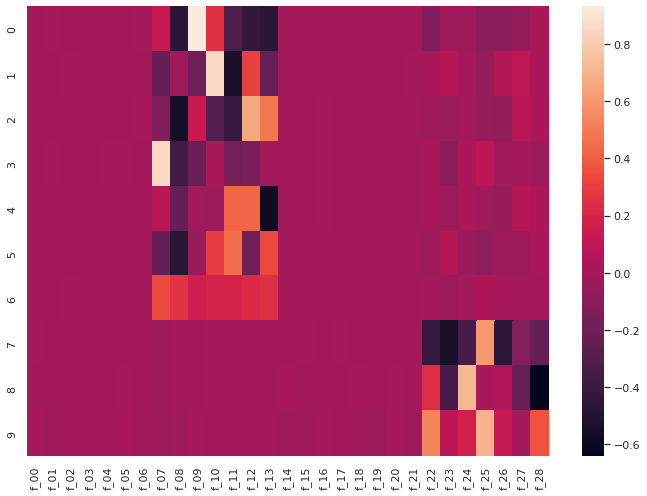

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_plus_pca.corr().iloc[29:,:29])

We see that the most informative features are f_07-f_13 and f_22-f_28

**K-means**

Let's start with k-means

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

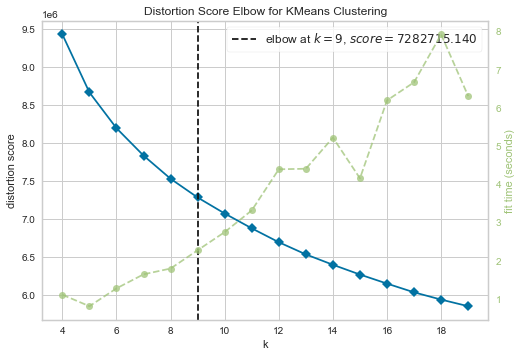

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20))
visualizer.fit(pca_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

We do not see a very distinctive elbow, so the method should not work well. However, for K-Means 9 classes are recommended, so we shoud try this out 

In [ ]:
kmeans = KMeans(n_clusters=9).fit_predict(pca_df)
kmeans

In [ ]:
output = pd.DataFrame()
output['Id'] = data['id']
output['Predicted'] = kmeans
# output.to_csv('/kaggle/working/jul22_kmeans9_1.csv',  index=False)

### **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
import collections

In [ ]:
sugg = [2,3,4,5]
# sugg = [x*50 for x in sugg]
for i in sugg:
    print('eps = ',i)
    for g in [10,15,20,25,30]:
        clustering = DBSCAN(eps=i, min_samples=g).fit(pca_df)
        clustering.labels_
        print(g, collections.Counter(list(clustering.labels_)))
        print('-----------')
#     if len(collections.Counter(list(clustering.labels_))) == 1:
#         break

eps =  2
10 Counter({-1: 98000})
-----------
15 Counter({-1: 98000})
-----------
20 Counter({-1: 98000})
-----------
25 Counter({-1: 98000})
-----------
30 Counter({-1: 98000})
-----------
eps =  3
10 Counter({-1: 95556, 1: 963, 5: 356, 0: 83, 12: 74, 8: 53, 9: 31, 38: 30, 17: 24, 23: 21, 2: 20, 22: 19, 35: 19, 53: 18, 6: 18, 7: 16, 14: 16, 13: 16, 67: 16, 80: 15, 16: 15, 11: 14, 70: 14, 56: 14, 3: 13, 51: 13, 42: 13, 44: 12, 18: 12, 72: 12, 65: 12, 54: 12, 62: 12, 48: 11, 19: 11, 26: 11, 39: 10, 10: 10, 40: 10, 4: 10, 68: 10, 60: 10, 36: 10, 46: 10, 55: 10, 15: 10, 58: 10, 20: 10, 74: 10, 37: 10, 64: 10, 75: 10, 81: 10, 33: 10, 71: 10, 34: 10, 59: 10, 32: 10, 82: 10, 73: 10, 69: 10, 47: 9, 77: 9, 24: 9, 28: 9, 78: 9, 27: 9, 63: 9, 31: 9, 29: 9, 49: 9, 30: 9, 66: 8, 61: 8, 76: 8, 45: 8, 21: 8, 50: 8, 41: 8, 79: 7, 25: 7, 57: 6, 52: 6, 43: 4})
-----------
15 Counter({-1: 97626, 1: 157, 0: 138, 3: 24, 2: 15, 6: 15, 4: 15, 5: 10})
-----------
20 Counter({-1: 97920, 1: 37, 0: 23, 2: 20})
-

OK, let's try a DBSCAN tuning hack with an elbow method: https://stackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [ ]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(pca_df)
distances, indices = neighbors_fit.kneighbors(pca_df)

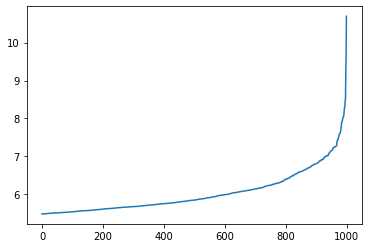

In [ ]:
distances = np.sort(distances, axis=0)
distances_n = distances[97000:,1]
plt.plot(distances_n)

In [ ]:
clustering = DBSCAN(eps=7, min_samples=20).fit(pca_df)
clustering.labels_
print(g, collections.Counter(list(clustering.labels_)))

30 Counter({0: 97877, -1: 123})


We see that DBSCAN does not works for this dataset: in the cases of adequate number of clusters, clusters themselves are highly imbalanced. So let's move to Gaussians

### **GMM**

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
from tqdm import tqdm

In [ ]:
gm = GaussianMixture(n_components=7, n_init=20, max_iter=300, random_state=0).fit_predict(df) #0.49

In [ ]:
gm = GaussianMixture(n_components=8, n_init=20, max_iter=300, random_state=0).fit_predict(df) #0.47

I will stick with 7 components, as I iteratively found it is the optimal number. We see that Gaussians work the best, so let's try it on PCA dataset and with informative variables only

In [ ]:
gm = GaussianMixture(n_components=7, n_init=20, max_iter=300, random_state=0).fit_predict(pca_df) #0.33

In [9]:
df_cut = df[['f_07','f_08','f_09','f_10','f_11','f_12','f_22','f_23','f_24','f_25','f_26','f_27','f_28']]

In [ ]:
gm = GaussianMixture(n_components=7, n_init=20, max_iter=300, random_state=0).fit_predict(df_cut) #0.48

In [ ]:
output = pd.DataFrame()
output['Id'] = data.id
output['Predicted'] = gm
output.to_csv('/content/drive/MyDrive/jul22_gmm7_cut.csv', index = False) #0.48

We see that PCA dramatically worsened the performance of the clusterization. This may mean, that the variables are interconnected in a non-linear fashion which cannot be implemented in PCA. The cut version totalled the same performance as the full version.

### **BGMM**

In [49]:
from sklearn.mixture import BayesianGaussianMixture

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
bay_gmm = BayesianGaussianMixture(n_components=7, n_init=20)

bay_gmm.fit(df)

bay_gmm_weights = bay_gmm.weights_
np.round(bay_gmm_weights, 2)

array([0.19, 0.12, 0.14, 0.18, 0.14, 0.13, 0.11])

In [ ]:
bay_res = bay_gmm.predict(df) #0.51
bay_res

array([4, 2, 4, ..., 3, 3, 5])

In [ ]:
output = pd.DataFrame()
output['Id'] = data.id
output['Predicted'] = bay_res
output.to_csv('/content/drive/MyDrive/jul22_bgmm7.csv', index = False) 

Let's add PowerTransfoemer that makes distribution more Gaussian, it should enhance result

In [6]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()

In [ ]:
transfromed_df =transformer.fit_transform(df_cut)

In [ ]:
bay_gmm = BayesianGaussianMixture(n_components=6, n_init=10)

bay_gmm.fit(transfromed_df)

bay_gmm_weights = bay_gmm.weights_
np.round(bay_gmm_weights, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


array([0.22, 0.22, 0.18, 0.11, 0.13, 0.14])

In [ ]:
bay_res = bay_gmm.predict(transfromed_df) 
bay_res

In [ ]:
output = pd.DataFrame()
output['Id'] = data.id
output['Predicted'] = bay_res
output.to_csv('/content/drive/MyDrive/jul22_bgmm6_trans.csv', index = False) #0.53

When using Bayesian Gaussians we have bettered our performance. Interestingly, for BGMM cut version works better.
Next, I want to apply scalers and Gaussian transformer to get better results

In [ ]:
transfromed_df =transformer.fit_transform(df_cut)
scaled_df = scaler.fit_transform(transfromed_df)

bay_gmm = BayesianGaussianMixture(n_components=6, n_init=20, max_iter = 300)

bay_gmm.fit(scaled_df)

bay_gmm_weights = bay_gmm.weights_
print(np.round(bay_gmm_weights, 2))

bay_res = bay_gmm.predict(scaled_df) 


In [ ]:
output = pd.DataFrame()
output['Id'] = data.id
output['Predicted'] = bay_res
output.to_csv('/content/drive/MyDrive/jul22_bgmm6_scaledTHANtransed.csv', index = False) #0.53

In [7]:
from sklearn.preprocessing import RobustScaler
rb_scaler=RobustScaler()

In [10]:
transfromed_df = transformer.fit_transform(df_cut)
robust_scaled_df = rb_scaler.fit_transform(transfromed_df)

In [ ]:
bay_gmm = BayesianGaussianMixture(n_components=6, n_init=20, max_iter = 300)

bay_gmm.fit(robust_scaled_df)

bay_gmm_weights = bay_gmm.weights_
print(np.round(bay_gmm_weights, 2))

bay_res = bay_gmm.predict(robust_scaled_df) 

[0.22 0.22 0.14 0.18 0.11 0.13]


In [ ]:
output = pd.DataFrame()
output['Id'] = data.id
output['Predicted'] = bay_res
output.to_csv('/content/drive/MyDrive/jul22_bgmm6_ROBscaledTHANtransed.csv', index = False) #0.53082 

In [ ]:
transfromed_df = transformer.fit_transform(df)
robust_scaled_df = rb_scaler.fit_transform(transfromed_df)

In [ ]:
bay_gmm = BayesianGaussianMixture(n_components=6, n_init=20, max_iter = 400)

bay_gmm.fit(robust_scaled_df)

bay_gmm_weights = bay_gmm.weights_
print(np.round(bay_gmm_weights, 2))

bay_res = bay_gmm.predict(robust_scaled_df) 

[0.22 0.14 0.13 0.22 0.17 0.11]


In [ ]:
output = pd.DataFrame()
output['Id'] = data.id
output['Predicted'] = bay_res
output.to_csv('/content/drive/MyDrive/jul22_bgmm6_allvars_ROBscaledTHANtransed.csv', index = False) #0.55 best

### **Autoencoder**

In this section I try to cut dimensions with an autoencoder using DF version with significant variables only.

In [11]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
batch_size = 16
loader = torch.utils.data.DataLoader(torch.tensor(robust_scaled_df), batch_size=batch_size, shuffle=True,drop_last=True)

In [26]:
class AutoEncoderSeq(nn.Module):
  def __init__(self): 
    super().__init__()
    self.encoder = nn.Sequential(
            nn.Linear(robust_scaled_df.shape[1], 14), 
            nn.Tanh(),
            nn.Linear(14, 12),
            nn.Tanh(),
            nn.Linear(12, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 9),
            nn.Tanh(),
            nn.Linear(9, 9),
            nn.Tanh())    
    self.decoder = nn.Sequential(
            nn.Linear(9, 9),
            nn.Tanh(),
            nn.Linear(9, 10), 
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),            
            nn.Linear(10, 12),
            nn.Tanh(),
            nn.Linear(12, 14),
            nn.Tanh(),
            nn.Linear(14, robust_scaled_df.shape[1]),
            nn.Tanh())
    
  def forward(self, x):
    encodings = self.encoder(x)
    decodings = self.decoder(encodings)
    return decodings, encodings
      

In [42]:
model = AutoEncoderSeq()
criterion = nn.MSELoss()
learning_rate = 0.0003
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [43]:
num_epochs = 100

for epoch in tqdm(range(num_epochs)):
  
  model.train()

  for data in loader:

    optimizer.zero_grad()

    result = model(data.float())[0]

    loss = criterion(result, data.float())

    loss.backward()

    optimizer.step()

  model.eval()

  if (epoch+1)%10 == 0:

    print(f'EPOCH = {epoch+1}, TEST_LOSS = {loss}')

 10%|█         | 10/100 [02:26<22:00, 14.68s/it]

EPOCH = 10, TEST_LOSS = 0.14223048090934753


 19%|█▉        | 19/100 [04:38<19:48, 14.67s/it]

EPOCH = 20, TEST_LOSS = 0.10333346575498581


 30%|███       | 30/100 [07:21<17:15, 14.80s/it]

EPOCH = 30, TEST_LOSS = 0.10539967566728592


 40%|████      | 40/100 [09:49<14:46, 14.78s/it]

EPOCH = 40, TEST_LOSS = 0.1479683220386505


 50%|█████     | 50/100 [12:17<12:18, 14.77s/it]

EPOCH = 50, TEST_LOSS = 0.10822547972202301


 60%|██████    | 60/100 [14:44<09:47, 14.69s/it]

EPOCH = 60, TEST_LOSS = 0.06453966349363327


 70%|███████   | 70/100 [17:10<07:20, 14.69s/it]

EPOCH = 70, TEST_LOSS = 0.11895883083343506


 80%|████████  | 80/100 [19:37<04:54, 14.73s/it]

EPOCH = 80, TEST_LOSS = 0.1296750158071518


 90%|█████████ | 90/100 [22:04<02:26, 14.64s/it]

EPOCH = 90, TEST_LOSS = 0.11723531782627106


100%|██████████| 100/100 [24:32<00:00, 14.73s/it]

EPOCH = 100, TEST_LOSS = 0.11763647943735123


In [44]:
model.eval()
autoencoded_df = pd.DataFrame(model(torch.tensor(robust_scaled_df).float())[1].detach().numpy())

In [45]:
model.eval()
autodecoded_df = pd.DataFrame(model(torch.tensor(robust_scaled_df).float())[0].detach().numpy())
autodecoded_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.763758,0.800867,0.296169,-0.904085,0.811282,-0.228760,-0.640315,0.791152,-0.563079,0.588251,0.763634,0.782866,0.846458
1,-0.880632,-0.894112,-0.059749,-0.339136,-0.262896,0.955107,-0.486856,0.393822,0.779270,0.000940,-0.504433,0.301896,-0.568183
2,0.263488,0.936274,-0.026880,0.400121,0.373863,-0.756597,0.900822,0.048486,-0.733299,-0.218695,0.841592,-0.802236,-0.710710
3,0.518990,-0.908642,0.666437,0.604213,0.037848,-0.426410,0.614315,-0.884004,0.706791,-0.811238,-0.460358,-0.212482,0.557902
4,0.430031,0.214658,0.162418,-0.408345,-0.812457,0.721116,0.215031,-0.912915,0.709780,-0.508913,0.852304,-0.349123,-0.703910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.267732,0.192739,-0.004307,-0.662059,-0.066981,0.501031,0.775990,0.458688,0.837805,-0.203148,-0.793705,0.108773,0.582677
97996,-0.565967,0.613684,-0.675450,-0.082703,-0.550441,0.891556,0.838664,-0.432627,0.287963,0.653341,0.039872,0.628547,0.558657
97997,0.699768,0.581300,0.462002,0.262395,-0.606863,-0.550053,-0.623537,0.866272,0.642989,0.123914,0.893247,0.779148,0.929112
97998,-0.907651,0.237340,0.300138,0.972094,-0.833129,0.344622,0.424759,0.376551,0.577306,-0.253313,-0.869324,-0.613099,0.452040


In [46]:
autoencoded_df.head()

,0,1,2,3,4,5,6,7,8
0,0.156444,0.004721,0.021652,-0.202581,0.040298,0.096756,0.160773,0.230759,-0.181267
1,0.065496,-0.132608,0.025635,0.218670,0.058852,0.076386,0.041924,-0.036057,0.079234
2,0.165144,0.173493,-0.014271,-0.066276,-0.140859,0.034474,-0.096138,0.301088,0.033748
3,-0.009346,0.279100,0.092452,0.060376,-0.078909,-0.062135,0.044912,-0.052107,0.239506
4,0.032105,0.018386,0.023207,0.230365,-0.053223,0.089265,-0.090262,0.290401,0.016091


In [47]:
pd.DataFrame(robust_scaled_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.737778,1.196363,0.796321,-0.374224,0.760158,0.000000,-0.533995,0.692779,-0.497543,0.575597,0.755581,0.812378,0.524370
1,-0.737778,-0.690429,-0.150511,-0.585445,-0.344727,1.320419,-0.403690,0.345115,0.747007,-0.083590,-0.430681,0.285181,-1.222626
2,0.000000,0.890868,-0.316863,0.169131,0.162052,-0.616436,1.667545,0.066430,-1.108999,-0.419032,0.770148,-0.724659,-1.717086
3,0.195443,-0.972867,0.701337,0.169131,0.162052,0.000000,0.554695,-0.924983,0.597828,-0.868985,-0.308455,-0.079607,0.248890
4,0.542560,0.197468,-0.316863,-0.819508,-1.429020,0.988990,0.174061,-1.125990,0.613478,-0.452706,0.915761,-0.293659,-0.865419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.000000,0.197468,0.137905,-0.374224,-0.168550,0.000000,0.722029,0.310197,0.930621,-0.052003,-0.775354,0.128845,0.348442
97996,-0.457440,0.560488,-0.975988,-0.374224,-0.937791,0.744060,0.877904,-0.325700,0.193928,0.586983,0.113099,0.539225,0.483523
97997,0.542560,0.560488,0.384485,0.000000,-0.530053,-0.387489,-0.751828,1.101885,0.627383,0.138524,1.209984,0.918630,0.442446
97998,-1.079470,0.383700,0.496147,0.625776,-0.937791,0.473714,0.211764,0.389857,0.496664,-0.208892,-0.850420,-0.421917,0.100798


In [50]:
bay_gmm = BayesianGaussianMixture(n_components=6, n_init=20, max_iter = 400)

bay_gmm.fit(autodecoded_df)

bay_gmm_weights = bay_gmm.weights_
print(np.round(bay_gmm_weights, 2))

bay_res = bay_gmm.predict(autodecoded_df) 

[0.23 0.21 0.17 0.09 0.13 0.16]


In [54]:
output = pd.DataFrame()
output['Id'] = data.id
output['Predicted'] = bay_res
output.to_csv('/content/drive/MyDrive/jul22_bgmm6_allvars_ROBscaledTHANtransed_AUTOENCODEDv2.csv', index = False) 

The scrore has significantly dropped. So, this is definately not the dataset for dimension reduction.

So, the best clustering algorithm for this dataset is BGMM